<a href="https://colab.research.google.com/github/ynpreet/Analysing-Russian-Troll-Tweets-data-using-Python/blob/main/Analysis_of_Russian_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Russian Tweets

*Author: Preet Mehta*


## Table of Contents

1. Establishing connection with kaggle
2. Importing libraties
3. Importing dataset    
4. Preparing Data for Exploratory Data Analysis (EDA)
5. Exploratory Data Analysis of Text Data
  * Total Twitter handles
  * Total tweets from Accounts
  * Total languages used
  * No of Users with most followers
  * No of Users based on organization
  * Most followed hastags
  * Word cloud for each of the 8 group's tweets
  * Time Series Data Visualization using Heatmaps
7. Sentiment Analysis
8. Conclusion
9. References

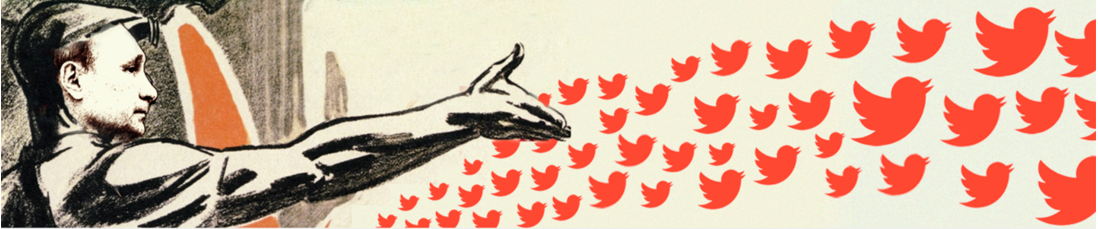

>### **1- Importing dataset ditectly from kaggle**
---

In [3]:
! pip install kaggle
! mkdir ~/.kaggle
! cp '/content/drive/MyDrive/Colab files/Twitter/Merged_df/kaggle.json' ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/Colab files/Twitter/Merged_df/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
from google.colab import files
files.upload()
#upload your kaggle credentials json file

In [5]:
#creating a directory
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
# Providing permission
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-12 11:59:54          18303  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10976  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           5516  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3902  
nickuzmenkov/nih-chest-xrays-tfrecords                      NIH Chest X-rays

In [9]:
#Downloading game of thrones twitter dataset
!kaggle datasets download -d fivethirtyeight/russian-troll-tweets

 99% 174M/175M [00:05<00:00, 31.2MB/s]
100% 175M/175M [00:05<00:00, 30.6MB/s]


In [10]:
!unzip '/content/russian-troll-tweets.zip'

Archive:  /content/russian-troll-tweets.zip
  inflating: IRAhandle_tweets_1.csv  
  inflating: IRAhandle_tweets_2.csv  
  inflating: IRAhandle_tweets_3.csv  
  inflating: IRAhandle_tweets_4.csv  
  inflating: IRAhandle_tweets_5.csv  
  inflating: IRAhandle_tweets_6.csv  
  inflating: IRAhandle_tweets_7.csv  
  inflating: IRAhandle_tweets_8.csv  
  inflating: IRAhandle_tweets_9.csv  


>### **2- Importing libraries**
---

In [12]:
# import packages
import os, glob
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import pickle
plt.style.use('ggplot')
from matplotlib.pyplot import figure

import tweepy
import matplotlib.pyplot as plt
from  textblob import TextBlob 
import time

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

>### **3- Importing dataset**
---

In [1]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


- Combining all 9 csv files into one csv

In [50]:
path = "/content/"

all_files = glob.glob(os.path.join(path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=',')
#     df['file'] = f.split('/')[-1]
    all_df.append(df)
    
merged_df = pd.concat(all_df, ignore_index=True, sort=True)
# merged_df=pd.read_csv('/content/IRAhandle_tweets_1.csv')

In [51]:
merged_df.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll
1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll
3,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll
4,9.060000e+17,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll


-  Saving the progress till now (In pickle as well as csv form)

In [7]:
merged_df.to_csv('/content/drive/MyDrive/Colab files/Twitter/Merged_df/merged_df.csv')

In [8]:
#pickled merged_df
import pickle
# to save pickle
with open('/content/drive/MyDrive/Colab files/Twitter/Merged_df/merged_df.pkl', 'wb') as handle:
    pickle.dump(merged_df, handle)

> ### **4- Preparing Data for Exploratory Data Analysis (EDA) of text data**

In [33]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

import re
# Regular expression for finding contractions

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the article headline
merged_df['content']=merged_df['content'].apply(lambda x:expand_contractions(x))

Here, the expand_contractions function uses regular expressions to map the contractions in the text to their expanded forms from the dictionary. 

I will be using regular expressions a lot in the upcoming sections. Now that we have expanded the contractions, it’s time to **lowercase the words**.

# Lowercase the headlines
- In NLP, models treat words like Goat and goat differently, even if they are the same. Therefore, to overcome this problem, we lowercase the words. 
- Here, I am using the lower() function available in Python for converting text to lowercase:

In [53]:
merged_df['cleaned']=merged_df['content'].str.lower()

# Remove digits and words containing digits
Next, we need to **remove numbers and words** containing **digits** from the article. 

I am doing this because **digits and words containing digits do not give much importance to the main words**. 

To do this, I am using regular expressions with lambda functions.

In [54]:
merged_df['cleaned']=merged_df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x)) 

# Remove Punctuations
Punctuations are the marks in English like commas, hyphens, full stops, etc. These are important for English grammar but **not for text analysis**. 

Therefore, they need to be removed:

In [56]:
merged_df['cleaned']=merged_df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

Here, string.punctuations function contains all the punctuations and we use regular expressions to search them in the text and remove them. 

- Finally, we still have some extra spaces present in the data. Let’s remove them:

In [57]:
# Removing extra spaces
merged_df['cleaned']=merged_df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

- Saving all the progress till now

In [58]:
#picled cleaned merged_df
# to save pickle
with open('/content/drive/MyDrive/Colab files/Twitter/Merged_df/1file/df_cleaned.pkl', 'wb') as handle:
    pickle.dump(merged_df, handle)

In [59]:
merged_df.to_csv('/content/drive/MyDrive/Colab files/Twitter/Merged_df/1file/cleaned_df.csv')

Great! We have cleaned the text data and are just one section away from the EDA stage!

# Preparing Text Data for Exploratory Data Analysis (EDA)
We have already cleaned our data and have our corpus ready, but there are still some steps left to be done before EDA. 

In this section, we’ll create a **Document Term Matrix** that we’ll later use in our analysis.

Now, you might be wondering what is a Document Term Matrix and why do we have to create one?

A **Document Term Matrix** provides the frequency of a word in a corpus (collection of documents), which in this case are articles. 

It helps in analyzing the occurrence of words in different documents in a corpus. The following figure is an example of a document term matrix:

<img src ="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/04/et22-e1586856677843.png">

In this section, we’ll do the following things:

1. Stopwords Removal
  - Stopwords are the most common words of a language like ‘I’, ‘this’, ‘is’, ‘in’ which do not add much value to the meaning of a document. 
  - These values are removed to decrease the dataset size and increase focus on meaningful words.
2.  Lemmatization
  - Lemmatization is a systematic process of reducing a token to its lemma. It uses vocabulary, word structure, part of speech tags, and grammar relations to convert a word to its base form.
3.  Create Document Term Matrix

We’ll use **SpaCy** for the removal of stopwords and lemmatization. It is a library for advanced Natural Language Processing in Python and Cython.

In [22]:
import spacy
import en_core_web_sm

nlp = en_core_web_sm.load()

In [23]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 1.7 MB 8.2 MB/s 
     |████████████████████████████████| 952 kB 50.0 MB/s 
  Attempting uninstall: wheel
    Found existing installation: wheel 0.37.0
    Uninstalling wheel-0.37.0:
      Successfully uninstalled wheel-0.37.0
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     |████████████████████████████████| 6.0 MB 8.0 MB/s            
     |████████████████████████████████| 451 kB 32.3 MB/s            
     |████████████████████████████████| 181 kB 52.7 MB/s            
     |████████████████████████████████| 10.1 MB 27.5 MB/s            
     |████████████████████████████████| 42 kB 411 kB/s             
     |████████████████████████████████| 628 kB 46.9 MB/s            
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uni

     |████████████████████████████████| 13.9 MB 9.9 MB/s            
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [27]:
options = ['RightTroll','Fearmonger', 'LeftTroll', 'Unknown',
       'HashtagGamer', 'NewsFeed', 'Commercial'] 
    
# selecting rows based on condition 
merged_df = merged_df[merged_df['account_category'].isin(options)] 

In [61]:
merged_df['lemmatized']=merged_df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))


# df['lemmatiz']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

Saving progress till now

In [62]:
#pickled merged_df
import pickle
# to save pickle
with open('/content/drive/MyDrive/Colab files/Twitter/Merged_df/1file/lemmatized.pkl', 'wb') as handle:
    pickle.dump(merged_df, handle)

> ### **5- Exploratory data analysis**

**Total Twitter handles**

In [70]:
merged_df.author.nunique()

2848

**Total tweets from accounts**

In [75]:
total_rows = merged_df['account_category'].count()
print (total_rows)

2973371


**Total languages used**

In [36]:
df_language=merged_df.language.value_counts()

s = pd.Series(df_language,
              name="Languages Used in Tweets")
df_language=s.to_frame()
df_language.head()

,Languages Used in Tweets
English,2128963
Russian,624124
German,87171
Ukrainian,39361
Italian,18254


Text(0, 0.5, 'No of Tweets')

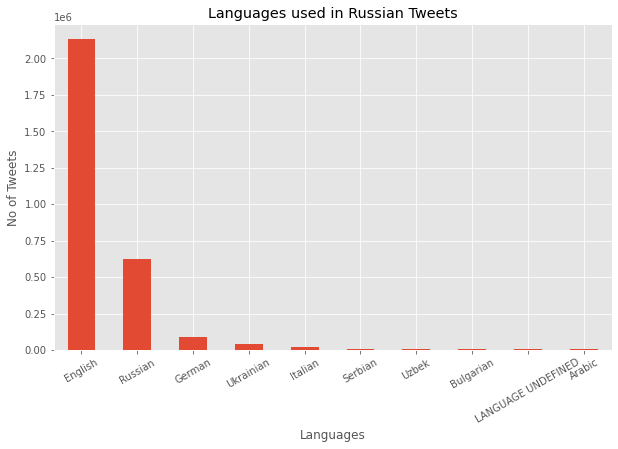

In [42]:
# ax = df2.plot.bar(rot=0, figsize=(20, 10))
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
# %config InlineBackend.figure_format = 'retina'
# df2.plot(kind="bar")

df_language["Languages Used in Tweets"][:10].plot(kind="bar", title="test")
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Languages used in Russian Tweets")
plt.xlabel("Languages")
plt.ylabel("No of Tweets")

**Users with most followers**

In [61]:
df_followers= merged_df[['author','followers']]
df_followers=df_followers.groupby(['author']).sum()
df_followers=df_followers.sort_values(by='followers',ascending=False)

Text(0, 0.5, 'No of followers')

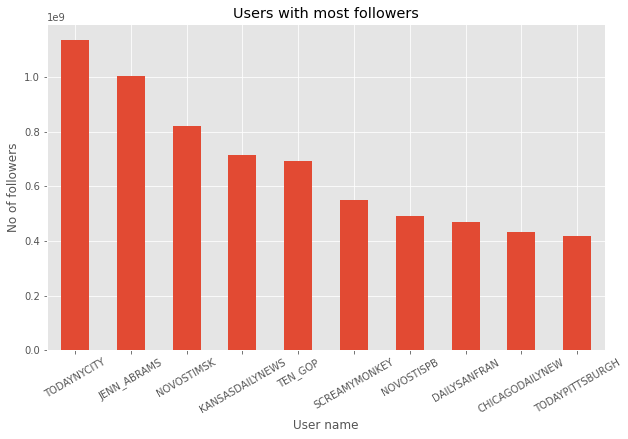

In [64]:
# ax = df2.plot.bar(rot=0, figsize=(20, 10))
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
# %config InlineBackend.figure_format = 'retina'
# df2.plot(kind="bar")

df_followers['followers'][:10].plot(kind="bar", title="test")
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Users with most followers")
plt.xlabel("User name")
plt.ylabel("No of followers")

**Organizations count**

In [ ]:
df_accountcategory=merged_df['account_category'].value_counts()
df_accountcategory

NonEnglish      837725
RightTroll      719087
NewsFeed        599294
LeftTroll       427811
HashtagGamer    241827
Commercial      122582
Unknown          13905
Fearmonger       11140
Name: account_category, dtype: int64

In [ ]:
s = pd.Series(df_accountcategory,
              name="Number of account category")
df_accountcategory=s.to_frame()
df_accountcategory.head()

,Number of account category
NonEnglish,837725
RightTroll,719087
NewsFeed,599294
LeftTroll,427811
HashtagGamer,241827


Text(0, 0.5, 'No of tweets')

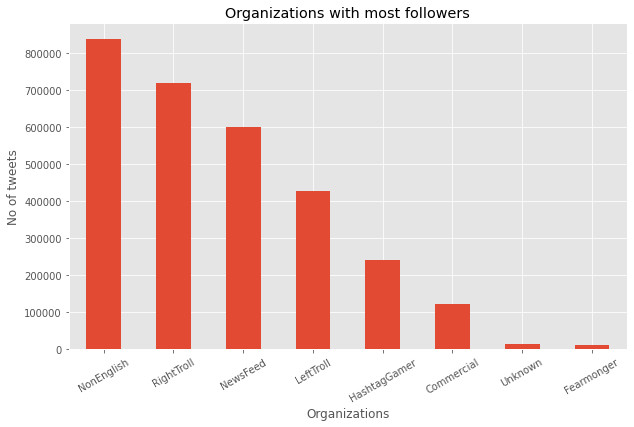

In [ ]:
# ax = df2.plot.bar(rot=0, figsize=(20, 10))
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
# %config InlineBackend.figure_format = 'retina'
# df2.plot(kind="bar")

df_accountcategory['Number of account category'].plot(kind="bar", title="test")
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Organizations with most followers")
plt.xlabel("Organizations")
plt.ylabel("No of tweets")

**Most followed hastags**

In [104]:
df_hashtags=merged_df.content.str.extractall(r'(\#\w+)')[0].value_counts()

Text(0, 0.5, 'No of tweets')

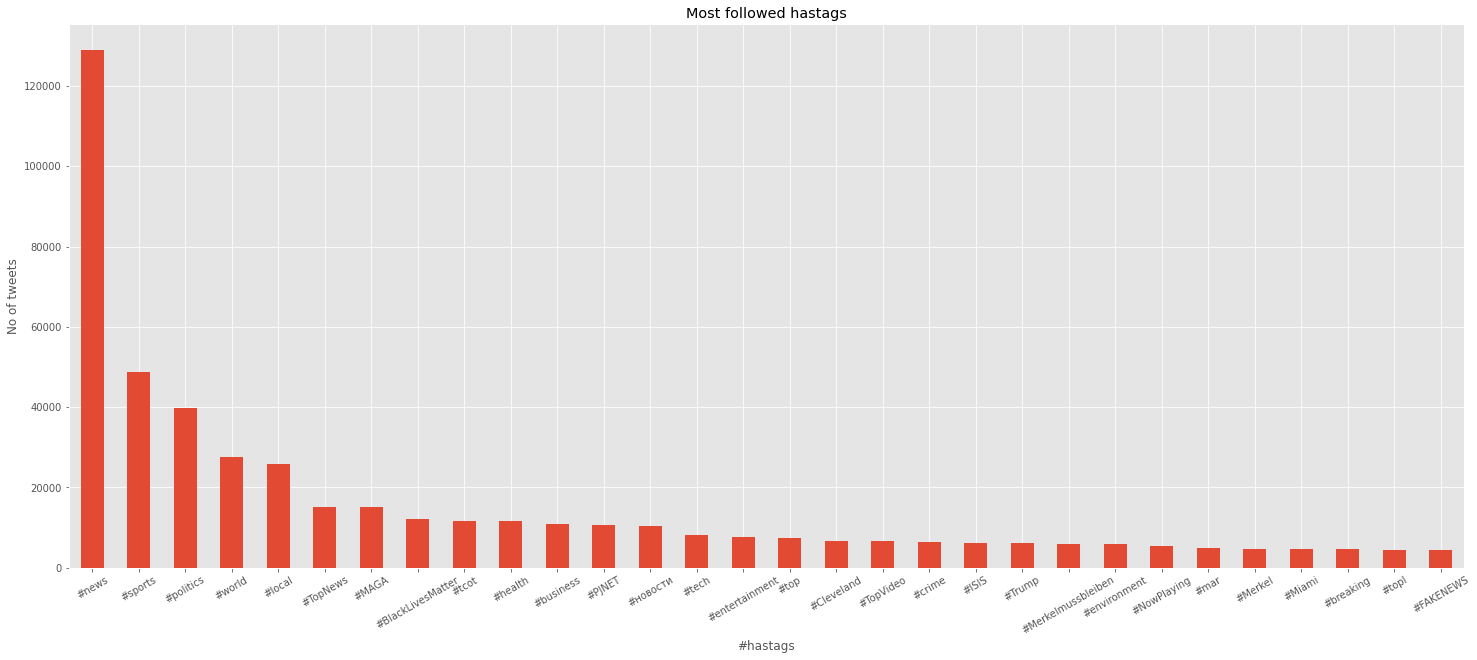

In [105]:
s = pd.Series(df_hashtags,
              name="Number of Hastags")
df_hashtags=s.to_frame()
df_hashtags.head()

# ax = df2.plot.bar(rot=0, figsize=(20, 10))
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams["figure.figsize"] = [25, 10]
# Set up with a higher resolution screen (useful on Mac)
# %config InlineBackend.figure_format = 'retina'
# df2.plot(kind="bar")

df_hashtags['Number of Hastags'][:30].plot(kind="bar", title="test")
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Most followed hastags")
plt.xlabel("#hastags")
plt.ylabel("No of tweets")

> ### **Generating word cloud**
---

In [63]:
options = ['RightTroll','Fearmonger', 'LeftTroll', 'Unknown',
       'HashtagGamer', 'NewsFeed', 'Commercial'] 
    
# selecting rows based on condition 
rslt_df = merged_df[merged_df['account_category'].isin(options)] 

In [65]:
# Here we have grouped the headlines by its publishing years
# df_pickled['year'] = pd.DatetimeIndex(df_pickled['pub_date']).year
df_grouped=rslt_df[['account_category','lemmatized']].groupby(by='account_category').agg(lambda x:' '.join(x))
df_grouped

,lemmatized
account_category,
Commercial,guide write research paper apa style httpstco ...
Fearmonger,foodpoisoning joke walmart kochfarms httpstco ...
HashtagGamer,week googlytag host itwasjustthatonetime today...
LeftTroll,blacklivesmatter blm equality equalrights http...
NewsFeed,albuquerque man arrest try sell steal gun part...
RightTroll,sit democrat senator trial corruption have bar...
Unknown,dentist ask assistant suction water mouthbut t...


In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

In [67]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer 
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aaaaaaaaaaaaand,aaaaaaaaaall,aaaaaaaamen,aaaaaaaand,aaaaaaand,aaaaaaargh,aaaaaand,aaaaaarrrrggghhh,aaaaand,aaaaannnnndddddobama,aaaaargh,aaaaawww,aaaahhhhh,aaaahhhhhhh,aaaand,aaaangieloza,aaabbey,aaah,aaahh,aaahhahhaaa,aaahhhh,aaajla,aaalexisxoxo,aaalskdjfhg,aaamen,aaand,aaanmarkaz,aaantoniou,aaarrrrrrrrrgggggg,aaathena,aaawww,aaawwww,aaba,aabjorg,aabjsc,aac,aacc,aacccdp,...,金田隠しだ,防衛省,難民の多くが,雨がけっこう降りましたが大丈夫でしたか,面白すぎ,風雪に,食品問題,驚き,高野病院奮戦記,鬼畜米英,鼻を骨折,ꭶꮎ,ꭿll,ꮆꭼꮢꭺꮮꭰ,ꮇꮎꮪꭲꮤꭺnꭲꭼꭰ,ꮑꭵꮆꮋꮖ,ꮚꮛꭰꮑꮛꭶꭰꮨꮍ,ꮮꭺꮖꭼ,ꮶꮎꮲꮮꭵꮖꮓ,미국의,시우민,트럼프,행복합니다,희망,ﬁght,ｄｏ,ｆｏｌｌｏｗ,ｆｏｌｌｏｗｂａｃｋ,ｆｏｌｌｏｗｅｒｓ,ｉｆ,ｍｇｗｖ,ｎｏ,ｒｅｔｗｅｅｔ,ｔｈｅｙ,ｔｌｆ,ｗａｎｔ,ｗａｒｎｉｎｇ,ｗｈ破産申請,ｙｏｕ,ｱﾚ
account_category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Commercial,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fearmonger,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
HashtagGamer,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LeftTroll,15,0,0,0,0,1,1,0,1,0,4,0,0,1,1,1,0,0,0,1,0,0,1,2,0,0,0,1,1,0,1,0,1,1,1,2,1,0,0,1,...,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,9,9,2,11,5,0,9,1,0,2,1,0,11,0
NewsFeed,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
RightTroll,4,4,1,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,2,1,1,1,0,1,1,1,0,0,1,2,1,3,0,1,3,0,1,1,0,1,3,1
Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
delete_columns=["wooow" ,"omg", "ask", "httptco", "httpstco", "set"]
df_dtm = df_dtm[df_dtm.columns.difference(delete_columns)]
# df_dtm = df_dtm.loc[:, ~df.columns.isin(delete_columns)]
# df_dtm.drop("httpstco", axis=0, inplace=True)
df_dtm

,aa,aaa,aaaaaaaaaaaaand,aaaaaaaaaall,aaaaaaaamen,aaaaaaaand,aaaaaaand,aaaaaaargh,aaaaaand,aaaaaarrrrggghhh,aaaaand,aaaaannnnndddddobama,aaaaargh,aaaaawww,aaaahhhhh,aaaahhhhhhh,aaaand,aaaangieloza,aaabbey,aaah,aaahh,aaahhahhaaa,aaahhhh,aaajla,aaalexisxoxo,aaalskdjfhg,aaamen,aaand,aaanmarkaz,aaantoniou,aaarrrrrrrrrgggggg,aaathena,aaawww,aaawwww,aaba,aabjorg,aabjsc,aac,aacc,aacccdp,...,金田隠しだ,防衛省,難民の多くが,雨がけっこう降りましたが大丈夫でしたか,面白すぎ,風雪に,食品問題,驚き,高野病院奮戦記,鬼畜米英,鼻を骨折,ꭶꮎ,ꭿll,ꮆꭼꮢꭺꮮꭰ,ꮇꮎꮪꭲꮤꭺnꭲꭼꭰ,ꮑꭵꮆꮋꮖ,ꮚꮛꭰꮑꮛꭶꭰꮨꮍ,ꮮꭺꮖꭼ,ꮶꮎꮲꮮꭵꮖꮓ,미국의,시우민,트럼프,행복합니다,희망,ﬁght,ｄｏ,ｆｏｌｌｏｗ,ｆｏｌｌｏｗｂａｃｋ,ｆｏｌｌｏｗｅｒｓ,ｉｆ,ｍｇｗｖ,ｎｏ,ｒｅｔｗｅｅｔ,ｔｈｅｙ,ｔｌｆ,ｗａｎｔ,ｗａｒｎｉｎｇ,ｗｈ破産申請,ｙｏｕ,ｱﾚ
account_category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Commercial,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Fearmonger,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
HashtagGamer,7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
LeftTroll,15,0,0,0,0,1,1,0,1,0,4,0,0,1,1,1,0,0,0,1,0,0,1,2,0,0,0,1,1,0,1,0,1,1,1,2,1,0,0,1,...,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,9,9,2,11,5,0,9,1,0,2,1,0,11,0
NewsFeed,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
RightTroll,4,4,1,0,1,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,2,1,1,1,0,1,1,1,0,0,1,2,1,3,0,1,3,0,1,1,0,1,3,1
Unknown,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
#pickled merged_df
import pickle
# to save pickle
with open('/content/drive/MyDrive/Colab files/Twitter/Merged_df/1file/df_grouped.pkl', 'wb') as handle:
    pickle.dump(df_grouped, handle)

In [71]:
#pickled merged_df
import pickle
# to save pickle
with open('/content/drive/MyDrive/Colab files/Twitter/Merged_df/1file/df_dtm.pkl', 'wb') as handle:
    pickle.dump(df_dtm, handle)

Finally, we have completed all the procedures required before starting our analysis, and we have our dataset present in the exact format needed for the exploration stage.

Yes – it’s finally time for **Exploratory Data Analysis using word cloud**! 

It is a crucial part of any data science project because that’s where you get to know more about the data. 

In this phase, you can reveal hidden patterns in the data and generate insights from it.

So, let’s start by looking at the common words present in the Articles for date.

- For this, I will use the **document term matrix** created earlier with **word clouds** for plotting these words. 
- Word clouds are the visual representations of the frequency of different words present in a document. 
- It gives importance to the more frequent words which are bigger in size compared to other less frequent words.

Word clouds can be generated using the wordcloud library. So, let’s plot word clouds for each product:

# Generating Wordcloud for each organization
 Wordcloud is a great way to represent text data. 
The size and color of each word that appears in the wordcloud indicate it’s frequency or importance.

Creating wordcloud in python with is easy but we need the ata in a form of a corpus.

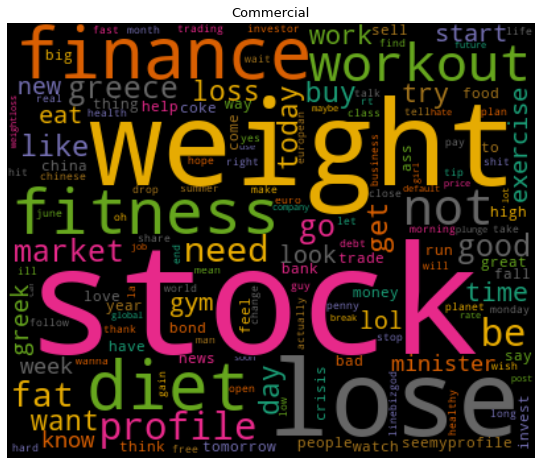

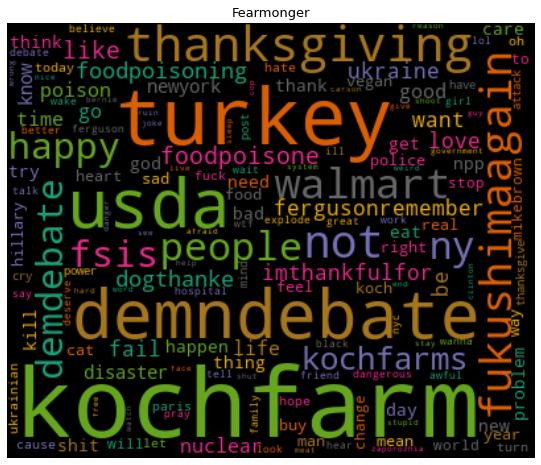

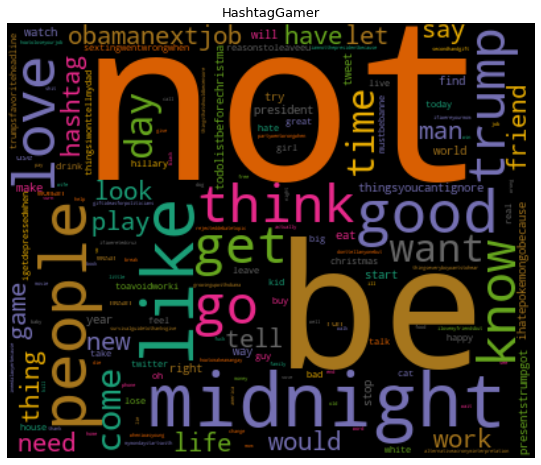

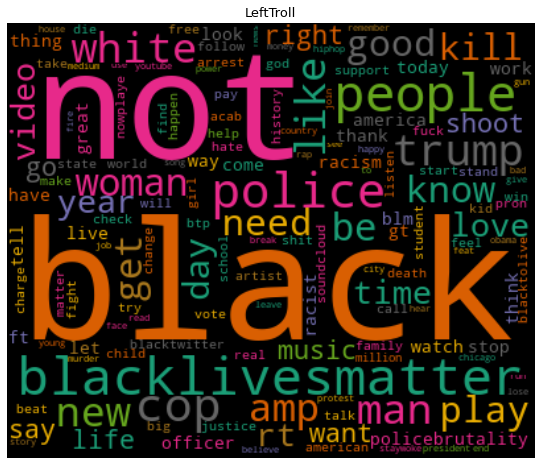

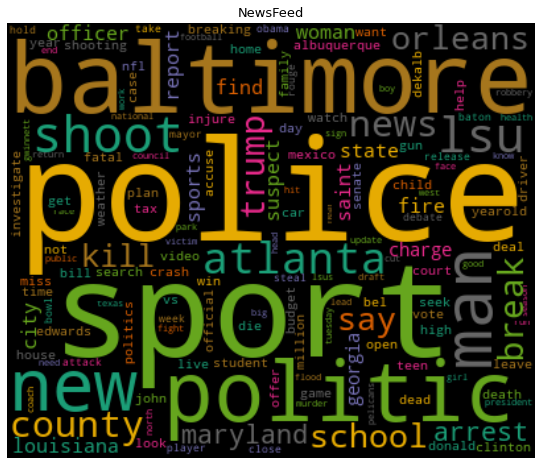

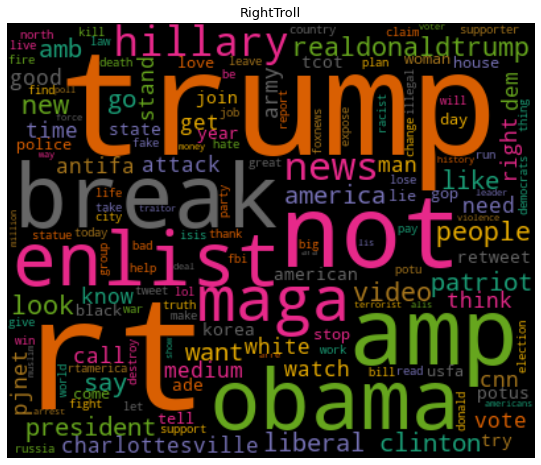

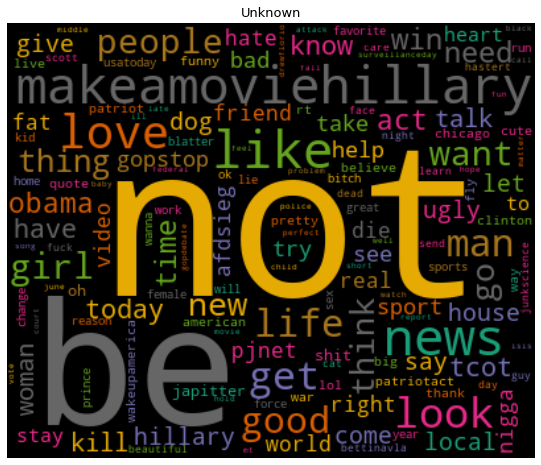

In [69]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt 
%matplotlib inline

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each year
for index,year in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[year].sort_values(ascending=False),year)

> ### **Time Series Data Visualization using Heatmaps**

In [13]:
path = "/content/"

all_files = glob.glob(os.path.join(path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=',')
#     df['file'] = f.split('/')[-1]
    all_df.append(df)
    
merged_df = pd.concat(all_df, ignore_index=True, sort=True)

In [73]:
df_calendar=merged_df['publish_date'].value_counts().to_frame()

In [74]:
df_calendar.reset_index(inplace=True)

In [75]:
df_calendar = df_calendar.rename(columns = {'index':'Date'})
df_calendar.rename(columns = {'publish_date':'Counts'}, inplace = True)
df_calendar

,Date,Counts
0,8/16/2017 1:29,202
1,8/16/2017 1:31,186
2,8/15/2017 17:01,149
3,8/16/2017 1:30,146
4,8/16/2017 1:32,144
...,...,...
896679,11/2/2015 6:10,1
896680,10/18/2016 12:41,1
896681,6/2/2015 13:28,1
896682,7/9/2016 0:25,1


In [77]:
# df_calendar['Date'] = pd.to_datetime(df_calendar['Date'])
!pip install python-dateutil
!pip install calplot
from dateutil import parser
import pandas as pd
from datetime import datetime
import calplot
# encode=[]

# for i in df_calendar['Date']:
#   a=parser.parse(i)
#   encode.append(i)
df_calendar['new_date'] = df_calendar['Date'].astype('datetime64[ns]')
# df_calendar['Dates'] = df_calendar['Date'].apply(lambda x: datetime.strptime(x, '%m-%d-%YT%HH:%mm'))
# df_calendar=df_calendar.set_index('Date')
# calplot.calplot(df_calendar)(df_calendar['Counts'])
df_calendar=df_calendar[['new_date','Counts']]
df_calendar


,new_date,Counts
0,2017-08-16 01:29:00,202
1,2017-08-16 01:31:00,186
2,2017-08-15 17:01:00,149
3,2017-08-16 01:30:00,146
4,2017-08-16 01:32:00,144
...,...,...
896679,2015-11-02 06:10:00,1
896680,2016-10-18 12:41:00,1
896681,2015-06-02 13:28:00,1
896682,2016-07-09 00:25:00,1


In [80]:
#pickled merged_df
import pickle
# to save pickle
with open('/content/drive/MyDrive/Colab files/Twitter/Merged_df/1file/df_calendar.pkl', 'wb') as handle:
    pickle.dump(df_calendar, handle)

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 900x856.8 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa381359990>,
       dtype=object))

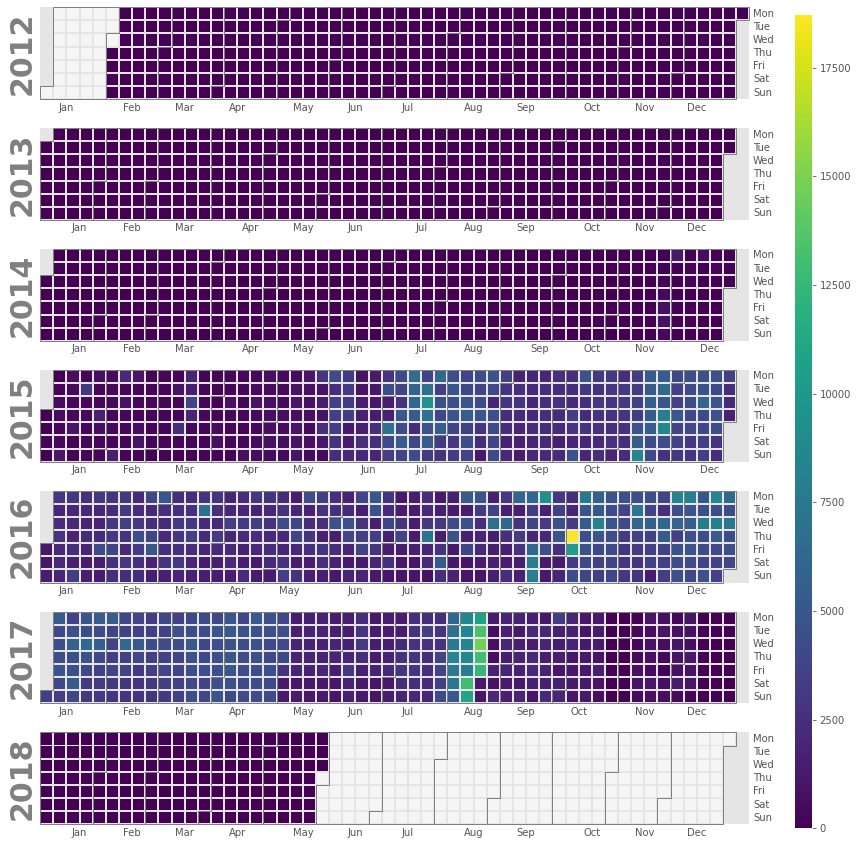

In [79]:
df_calendar=df_calendar.set_index('new_date')
calplot.calplot(df_calendar['Counts'])

(<Figure size 7920x2160 with 7 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa3171b1090>,
       dtype=object))

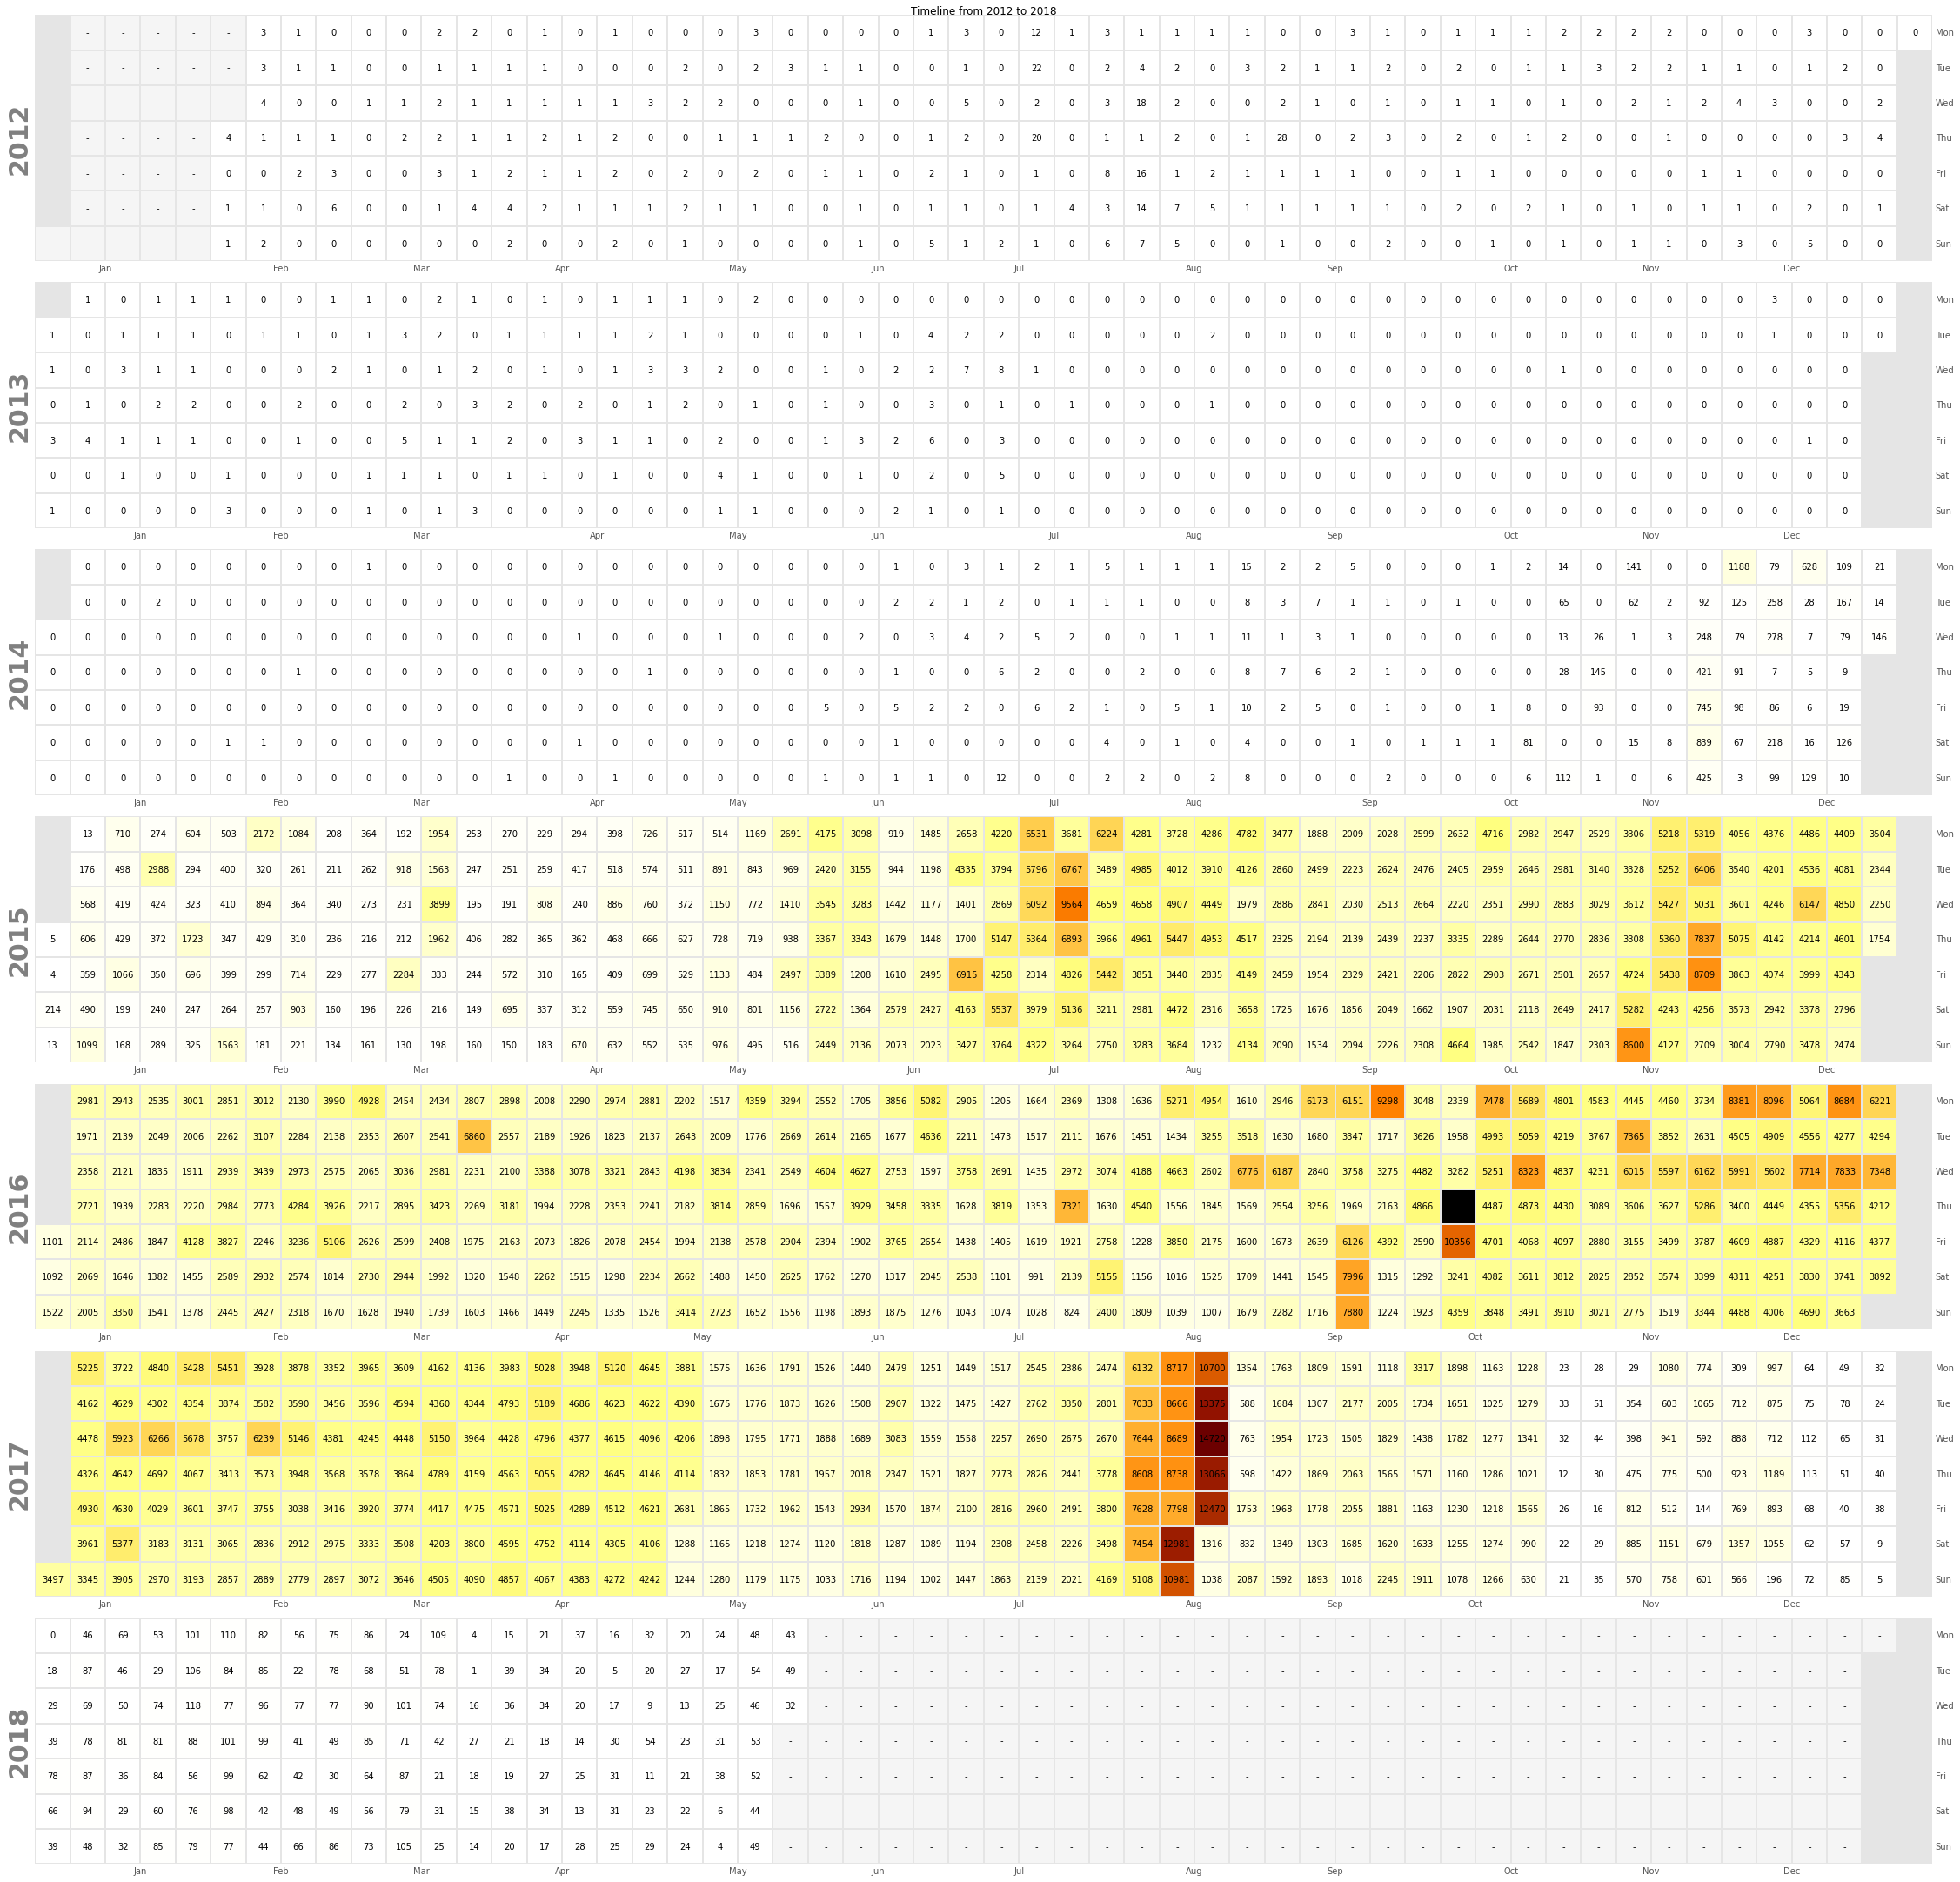

In [92]:
calplot.calplot(df_calendar['Counts'],edgecolor=None, cmap='afmhot_r',
colorbar=False,suptitle='Timeline from 2012 to 2018',
textformat='{:.0f}',textfiller='-',figsize=(110,30))
# calplot.calplot(df_calendar['Counts'],edgecolor=None, cmap='afmhot_r',
# colorbar=False,suptitle='Timeline from 2012 to 2018')

# calplot.calplot(df_calendar['Counts'],edgecolor=None, linewidth=2.3, cmap='afmhot_r',colorbar=False,suptitle='Timeline from 2012 to 2018')

> ### **6- Sentiment analysis of Tweets**
---

In [17]:
merged_df['sentiment'] = merged_df['content'][:1000000].apply(lambda tweet: TextBlob(tweet).sentiment)

In [27]:
df_polarity=pd.DataFrame(merged_df['sentiment'][:1000000].tolist(), index=merged_df[:1000000].index)

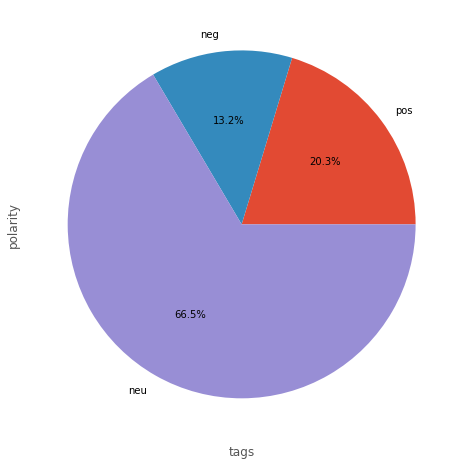

In [33]:
pos=0
neg=0
neu=0

# printing line by line
for i in df_polarity['polarity']:
   #print(tweet.text)
   #analysis=TextBlob(tweet) # here it will apply NLP\
  #  print(analysis.sentiment)
   # now checking polarity only
   if i > 0:
      pos=pos+1
   elif i == 0 :
      neu=neu+1
   else :
      neg=neg+1
      
# ploting graphs
plt.xlabel("tags")
plt.ylabel("polarity")
#plt.bar(['pos','neg','neu'],[pos,neg,neu])
plt.pie([pos,neg,neu],labels=['pos','neg','neu'],autopct="%1.1f%%")
plt.show()

> ### **7- Conclusion**
---

🔸 Their activities started on Feb 2, 2012, and ended on: May 30, 2018, when Twitter disabled these accounts. They were not active throughout but were present from time to time.

🔸 27% of tweets were in the non-English language (Serbian, Spanish, Polish, Russian) it just contributes to the amplification of spreading the message

🔸 Each of the 8 groups stick to their own agenda like:

- Right troll focused on nativists and inhabitants in the US and used hashtags common to the US like #maga, #tcop, #pjnet, #ccot, #RedNationRising

- Left troll focused on #BlackLivesMatter and #policebrutality

> ### **8- Refrences**
---

- https://www.analyticsvidhya.com/blog/2021/02/visualization-in-time-series-using-heatmaps-in-python/
- https://fivethirtyeight.com/features/why-were-sharing-3-million-russian-troll-tweets/
- https://www.youtube.com/watch?v=1JAhl3b3OFw